# Demo showing how to load data using Jupyter

## Setting Project path

1. Clone the project from Github repository
2. Then run the cell below with project path as the path where the head directory of project is located

In [13]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
#py.set_credentials_file(username='raoshaheryarkhan', api_key='KswnKD2cSzUMp6zxf25p')
import plotly.figure_factory as ff
import math

In [1]:
import sys
project_path = "PycharmProjects/Amazon-Mining"
# make sure to use position 1
sys.path.insert(1, project_path)

## loading packages

The package to load the JSON data is already created in 'data/json_loader.py' which inherits the interface 'data/loader.py', which is the generic data loader for any type of data. In order to add any new capabilities to data loading:
1. Add the function in 'data/loader.py' interface
2. Implement definition in the respective data wrapper (for example: 'data/json_loader.py')

In [2]:
import os
os.chdir("/Users\RSK\PycharmProjects\Amazon-Mining")
from src.data.json_loader import JSONLoader

In [3]:
# file_path corresponds to the file of the .gz file which contains the JSON file. 
os.chdir("/Users\RSK")
file_path = 'Documents\DataMining/reviews_Electronics_5.json.gz'
loader = JSONLoader()

## importing data

In [4]:
# data is a Pandas Dataframe object.
data = loader.load_data(file_path)

In [5]:
#data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [6]:
#data.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
1689183,A34BZM6S9L7QI4,B00LGQ6HL8,"Candy Cane ""Is it just me?""","[1, 1]",Burned these in before listening to them for a...,5.0,Boom -- Pop -- Pow. These deliver.,1405555200,"07 17, 2014"
1689184,A1G650TTTHEAL5,B00LGQ6HL8,"Charles Spanky ""Zumina Reviews""","[0, 0]",Some people like DJ style headphones or earbud...,5.0,"Thin and light, without compromising on sound ...",1405382400,"07 15, 2014"
1689185,A25C2M3QF9G7OQ,B00LGQ6HL8,Comdet,"[0, 0]",I&#8217;m a big fan of the Brainwavz S1 (actua...,5.0,Same form factor and durability as the S1 with...,1405555200,"07 17, 2014"
1689186,A1E1LEVQ9VQNK,B00LGQ6HL8,J. Chambers,"[0, 0]","I've used theBrainwavz S1 In Ear Headphones, a...",5.0,Superb audio quality in a very comfortable set...,1405641600,"07 18, 2014"
1689187,A2NYK9KWFMJV4Y,B00LGQ6HL8,"Mike Tarrani ""Jazz Drummer""","[0, 0]",Normally when I receive a review sample I can ...,5.0,Exceptional sound,1405209600,"07 13, 2014"


In [7]:
data.describe()

,overall,unixReviewTime
count,1.689188e+06,1.689188e+06
mean,4.222779e+00,1.340571e+09
std,1.185632e+00,6.342451e+07
min,1.000000e+00,9.292320e+08
25%,4.000000e+00,1.318118e+09
50%,5.000000e+00,1.360800e+09
75%,5.000000e+00,1.385078e+09
max,5.000000e+00,1.406074e+09


In [8]:
data.shape

(1689188, 9)

Data Types of Columns

In [9]:
data.dtypes 

reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
dtype: object

Null Values in data

In [10]:
data.isnull().sum()

reviewerID            0
asin                  0
reviewerName      24730
helpful               0
reviewText            0
overall               0
summary               0
unixReviewTime        0
reviewTime            0
dtype: int64

Number of Products reviewed


In [11]:
data.loc[:,'asin'].unique().shape[0] 

63001

Numbers of Distinct Reviewers 

In [12]:
data.loc[:,'reviewerID'].unique().shape[0] 

192403

In [ ]:
data.asin.unique().shape[0]

Overall Product ratings and by people count


In [31]:
da_o = data[['asin','overall']].groupby(['asin']).mean()
da_r = data[['asin','reviewerID']].groupby(['asin']).count()
pd.concat([da_o, da_r], axis=1)


,overall,reviewerID
asin,,
0528881469,2.400000,5
0594451647,4.200000,5
0594481813,4.000000,8
0972683275,4.461187,219
1400501466,3.953488,43
1400501520,4.400000,20
1400501776,4.150000,20
1400532620,3.609756,41
1400532655,3.807339,109


### Rating Mean Plots

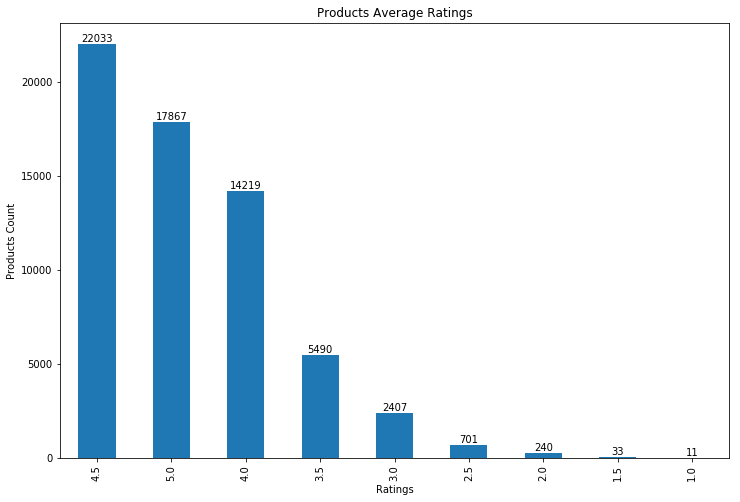

In [98]:
da_o = data[['asin','overall']].groupby(['asin'], as_index=False).mean()
da_o.overall = da_o.overall.apply(lambda x: (0.5 * math.ceil(2.0 * x)))
plt.figure(figsize=(12, 8))
da_oPlot = da_o.overall.value_counts().plot(kind='bar')
da_oPlot.set_title("Products Average Ratings")
da_oPlot.set_xlabel("Ratings")
da_oPlot.set_ylabel("Products Count")
rects = da_oPlot.patches
labels = [i for i in da_o.overall.value_counts()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    da_oPlot.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.savefig("PycharmProjects/Amazon-Mining/reports/Review Data/avgRatings.png")

In [18]:
from datetime import datetime
datetime_object = datetime.strptime(data.loc[0,'reviewTime'], '%m %d, %Y').date()
datetime_object

datetime.date(2013, 6, 2)

### Reviews Count Per Product Analysis

In [53]:
da_r = data[['asin','reviewerID']].groupby(['asin'], as_index=False).count()
da_r = da_r.rename(columns = {'reviewerID':'reviewCount'})
da_r.describe()

,reviewCount
count,63001.000000
mean,26.812082
std,75.821107
min,5.000000
25%,7.000000
50%,11.000000
75%,22.000000
max,4915.000000


In [54]:
bins = [4, 9, 19, 49, 99, 199, 499, 999, 9999]
group_names = ['5+', '10+' ,'20+', '50+', '100+','200+','500+','1000+']


In [55]:
da_r['rateCategories'] = pd.cut(da_r['reviewCount'], bins, labels=group_names)

### Number of Products group by Reviews Count

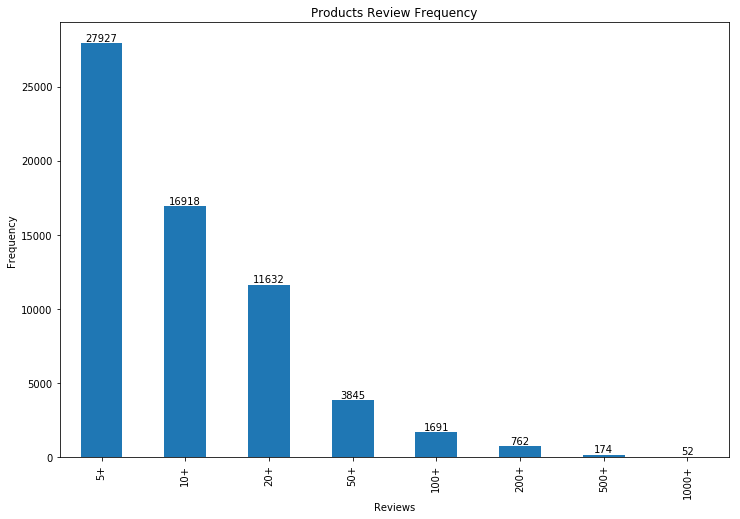

In [99]:
plt.figure(figsize=(12, 8))
da_rPlot = da_r.rateCategories.value_counts().plot(kind='bar')
da_rPlot.set_title("Products Review Frequency")
da_rPlot.set_xlabel("Reviews")
da_rPlot.set_ylabel("Frequency")
rects = da_rPlot.patches
labels = [i for i in da_r.rateCategories.value_counts()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    da_rPlot.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.savefig("PycharmProjects/Amazon-Mining/reports/Review Data/ReviewFreq.png")